   publish_date                                   headline_text
0      20050627     lawyer claims aust govt has abandoned corby
1      20051206  singapore tells spouses of patients hiv status
2      20141119      iron ore price slumps to new five year low
3      20060203   youth crime prevention schemes share in funds
4      20190521          harry triguboff speaks to the business


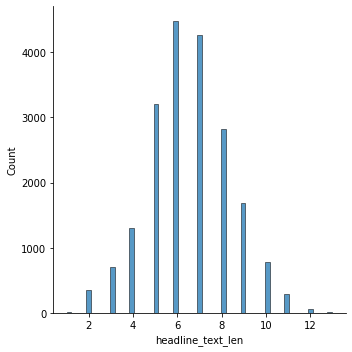

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Github URL
data_url = "https://raw.githubusercontent.com/keitazoumana/BERTopic-Topic-Modeling/main/abcnews_sample.csv"

# Read the dataset from the URL
data = pd.read_csv(data_url)
print(data.head())
# Create a new column corresponding to the length of each headline
data["headline_text_len"] = data["headline_text"].apply(lambda x : len(x.split()))

# Show the distribution of headline length 
sns.displot(data.headline_text_len, kde=False)

In [2]:
for idx in data.sample(3).index:
    headline = data.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(headline.publish_date))
    print("Text: {}\n".format(headline.headline_text))

Headline #9175:
Publication date: 20030407
Text: government recommends australia soccer chiefs be

Headline #2454:
Publication date: 20090408
Text: ballina police cells back operating

Headline #12318:
Publication date: 20041025
Text: labor looking for revenge over leaking of freeway



In [3]:
!pip install BERTopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.3 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 636 kB 45.8 MB/s 
     |████████████████████████████████| 5.2 MB 19.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 5.5 MB 41.3 MB/s 
     |████████████████████████████████| 1.3 MB 53.7 MB/s 
     |████████████████████████████████| 163 kB 81.1 MB/s 
     |████████████████████████████████| 7.6 MB 51.4 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340759 sha256=9c0a84cc72622f698761c9aa99a91c0af2a8a60a54fea7596c36a016d76f1470
  Stored in directory: /root/.cache

In [4]:
from bertopic import BERTopic
model=BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2',min_topic_size=7)
headline_topics, _=model.fit_transform(data.headline_text)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2022-11-02 09:50:31,629 - BERTopic - Transformed documents to Embeddings
2022-11-02 09:51:20,550 - BERTopic - Reduced dimensionality
2022-11-02 09:51:24,255 - BERTopic - Clustered reduced embeddings


In [5]:
freq=model.get_topic_info()
print("Number of topics:{}".format(len(freq)))
freq.head()

Number of topics:456


,Topic,Count,Name
0,-1,8580,-1_to_of_in_for
1,0,315,0_fire_bushfire_firefighters_bushfires
2,1,203,1_hospital_doctors_doctor_health
3,2,197,2_interview_extended_nathan_brett
4,3,148,3_coronavirus_covid_restrictions_cases


In [6]:
a_topic=freq.iloc[1]["Topic"]
model.get_topic(a_topic)

[('fire', 0.0542869349119032),
 ('bushfire', 0.04770381069815669),
 ('firefighters', 0.03274798726425911),
 ('bushfires', 0.02459110635363188),
 ('fires', 0.023850812918351127),
 ('crews', 0.019779472582336637),
 ('homes', 0.016956204984494957),
 ('blaze', 0.013524518308850602),
 ('burning', 0.013379033568595036),
 ('firefighter', 0.012380130690324053)]

In [16]:
model.visualize_barchart(top_n_topics=6)

In [8]:
from wordcloud import WordCloud
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

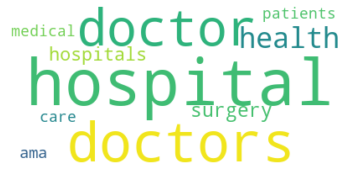

In [9]:
create_wordcloud(model,topic=1)

In [10]:
model.visualize_topics()

In [11]:
model.visualize_hierarchy(top_n_topics=30)

In [12]:
similar_topics, similarity = model.find_topics("politics", top_n = 3)
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('election', 0.07753768356985702), ('politics', 0.035445082675355954), ('voting', 0.028551042391852858), ('polls', 0.02498133514297532), ('postal', 0.02498133514297532), ('voters', 0.024947021881012672), ('electoral', 0.022840833913482284), ('votes', 0.018897884915640487), ('polling', 0.01873600135723149), ('daley', 0.017232099410624677)]
Similarity Score: 0.7100220614159859


In [15]:
model.save("my_best_model")

# Load the serialized model
my_best_model = BERTopic.load("/content/my_best_model")